In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
import os

In [2]:
from sklearn.preprocessing import PowerTransformer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [9]:
train=pd.read_csv("C://Users//User//Documents//Python_Projects//kaggle_fct//datasets//train.csv")
test=pd.read_csv("C://Users//User//Documents//Python_Projects//kaggle_fct//datasets//test.csv")

In [11]:
train.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596,51,3,258,0,510,221,232,148,...,0,0,0,0,0,0,0,0,0,5
1,2,2590,56,2,212,-6,390,220,235,151,...,0,0,0,0,0,0,0,0,0,5
2,3,2804,139,9,268,65,3180,234,238,135,...,0,0,0,0,0,0,0,0,0,2
3,4,2785,155,18,242,118,3090,238,238,122,...,0,0,0,0,0,0,0,0,0,2
4,5,2595,45,2,153,-1,391,220,234,150,...,0,0,0,0,0,0,0,0,0,5


In [12]:
train.describe()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,15120.00000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,...,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000
mean,7560.50000,2749.322553,156.676653,16.501587,227.195701,51.076521,1714.023214,212.704299,218.965608,135.091997,...,0.045635,0.040741,0.001455,0.006746,0.000661,0.002249,0.048148,0.043452,0.030357,4.000000
std,4364.91237,417.678187,110.085801,8.453927,210.075296,61.239406,1325.066358,30.561287,22.801966,45.895189,...,0.208699,0.197696,0.038118,0.081859,0.025710,0.047368,0.214086,0.203880,0.171574,2.000066
min,1.00000,1863.000000,0.000000,0.000000,0.000000,-146.000000,0.000000,0.000000,99.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,3780.75000,2376.000000,65.000000,10.000000,67.000000,5.000000,764.000000,196.000000,207.000000,106.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,7560.50000,2752.000000,126.000000,15.000000,180.000000,32.000000,1316.000000,220.000000,223.000000,138.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,11340.25000,3104.000000,261.000000,22.000000,330.000000,79.000000,2270.000000,235.000000,235.000000,167.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
max,15120.00000,3849.000000,360.000000,52.000000,1343.000000,554.000000,6890.000000,254.000000,254.000000,248.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


In [13]:
test.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
0,15121,2680,354,14,0,0,2684,196,214,156,...,0,0,0,0,0,0,0,0,0,0
1,15122,2683,0,13,0,0,2654,201,216,152,...,0,0,0,0,0,0,0,0,0,0
2,15123,2713,16,15,0,0,2980,206,208,137,...,0,0,0,0,0,0,0,0,0,0
3,15124,2709,24,17,0,0,2950,208,201,125,...,0,0,0,0,0,0,0,0,0,0
4,15125,2706,29,19,0,0,2920,210,195,115,...,0,0,0,0,0,0,0,0,0,0


In [15]:
#숫자형 변수만 따로 추출한다.
train_num=train.iloc[:,1:11]
test_num=test.iloc[:,1:11]

In [16]:
#정규분포 맞춰주기+표준화
pt=PowerTransformer()
pt.fit(train_num)
train_trans=pt.transform(train_num)
pt.fit(test_num)
test_trans=pt.transform(test_num)

In [17]:
train_num_df=pd.DataFrame(train_trans, columns=train_num.columns)
train_num_df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points
0,-0.333124,-0.929240,-1.994699,0.436979,-0.813135,-1.050849,0.127692,0.522247,0.256486,2.660631
1,-0.347866,-0.855788,-2.258050,0.243070,-1.042117,-1.296662,0.086805,0.696568,0.324383,2.643539
2,0.167820,0.056447,-0.860378,0.476284,0.331778,1.144305,0.704811,0.877686,-0.034945,2.610301
3,0.122846,0.194372,0.297617,0.372114,1.074683,1.101616,0.900164,0.877686,-0.321573,2.639090
4,-0.335580,-1.022553,-2.258050,-0.047739,-0.845792,-1.294392,0.086805,0.637715,0.301725,2.626654


In [18]:
test_num_df=pd.DataFrame(test_trans, columns=test_num.columns)
test_num_df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points
0,-1.103768,1.473489,0.144209,-2.272567,-0.765932,0.395858,-0.805786,-0.645807,0.325801,2.416701
1,-1.094922,-2.272107,0.008782,-2.272567,-0.765932,0.378865,-0.629869,-0.548407,0.217048,2.426431
2,-1.004928,-1.543275,0.274385,-2.272567,-0.765932,0.557708,-0.440792,-0.919501,-0.184899,2.317325
3,-1.017090,-1.349935,0.520961,-2.272567,-0.765932,0.541759,-0.361335,-1.205748,-0.499387,2.327377
4,-1.026178,-1.245987,0.751783,-2.272567,-0.765932,0.525712,-0.279631,-1.424875,-0.756306,2.337395


c:\users\user\anaconda3\envs\tensorflow\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


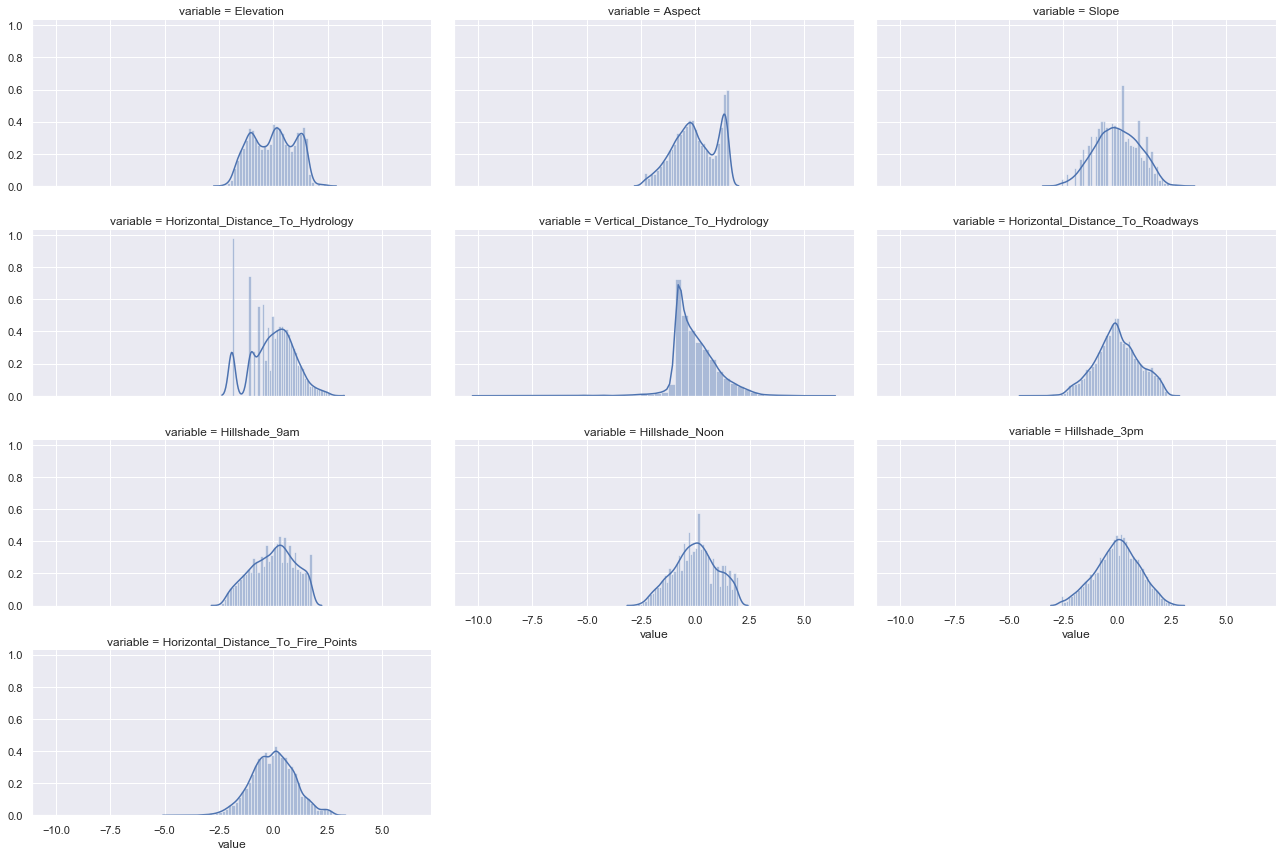

In [19]:
#분포를 확인한다.
g = sns.FacetGrid(train_num_df.melt(), col="variable", col_wrap=3, aspect=2)
g.map(sns.distplot,"value")

plt.show()

In [28]:
#훈련데이터 정렬?
train_x=train_num_df
train_y=train["Cover_Type"]

#의존변수를 숫자로 표현할 준비를 한다.
factor = pd.factorize(train['Cover_Type'])
train.Cover_Type=factor[0]
definitions=factor[1]
print(train.Cover_Type.head())
print(definitions)

#테스트데이터 정렬?
test_x=test_num_df

0    0
1    0
2    1
3    1
4    0
Name: Cover_Type, dtype: int64
Int64Index([5, 2, 1, 7, 3, 6, 4], dtype='int64')


In [21]:
#모델을 훈련시킨다.
ovr_clf=OneVsRestClassifier(RandomForestClassifier(n_estimators=211, criterion='entropy', random_state=523))
ovr_scores = cross_val_score(ovr_clf, train_x, train_y, cv=10)
print('Scores =', ovr_scores)

Scores = [0.70502646 0.75132275 0.75       0.73148148 0.74404762 0.73544974
 0.7255291  0.77248677 0.8207672  0.79298942]


In [22]:
print('CV accuracy: %.3f +/- %.3f' % (np.mean(ovr_scores), np.std(ovr_scores)))

CV accuracy: 0.753 +/- 0.032


In [25]:
ovr_clf.fit(train_x,train_y)

OneVsRestClassifier(estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=211, n_jobs=None,
            oob_score=False, random_state=523, verbose=0, warm_start=False),
          n_jobs=None)

In [43]:
#모델을 훈련시킨다.
rf_clf=RandomForestClassifier(n_estimators=211, criterion='entropy', random_state=523)
rf_scores = cross_val_score(rf_clf, train_x, train_y, cv=10)
print('Scores =', rf_scores)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(rf_scores), np.std(rf_scores)))

Scores = [0.69907407 0.76058201 0.75330688 0.73346561 0.74933862 0.73743386
 0.7281746  0.77248677 0.83134921 0.81415344]
CV accuracy: 0.758 +/- 0.038


In [44]:
rf_clf.fit(train_x,train_y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=211, n_jobs=None,
            oob_score=False, random_state=523, verbose=0, warm_start=False)

In [45]:
rf_clf.feature_importances_

array([0.45984117, 0.04793376, 0.03223281, 0.06235028, 0.0492416 ,
       0.12829686, 0.05255339, 0.04015612, 0.03648665, 0.09090736])

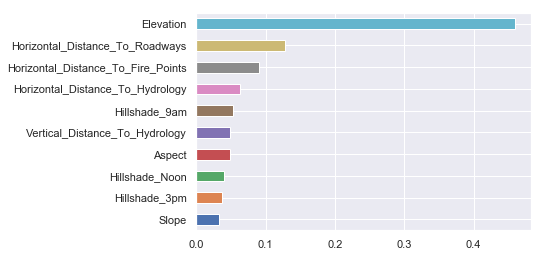

In [65]:
feat_importances = pd.Series(rf_clf.feature_importances_, index=train_x.columns)
feat_importances.sort_values().plot(kind='barh')